<a href="https://colab.research.google.com/github/thodorisrizos/Review_Movies/blob/main/Review_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving sst2-train.csv to sst2-train.csv


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded
Writing to output-comments.txt is finished.
csv_rates:  ['0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', 

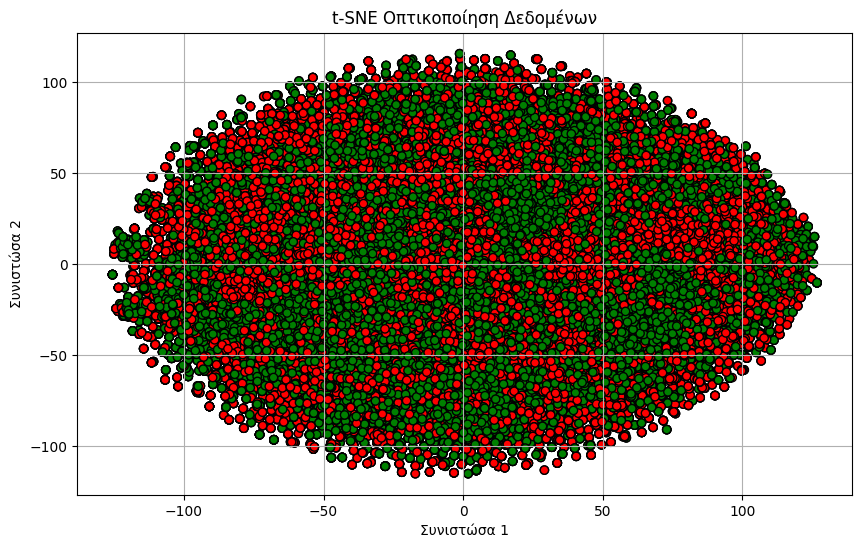

Program completed!


In [2]:
import csv
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)


# STEP-1: Read the second and third columns from csv file
def read_csv_file(file_name):

    # List to store the data
    second_third_column_data = []

    # Open file in read mode
    with open(file_name, 'r') as fn:
        reader = csv.reader(fn)
        next(reader)  # Skip the header (first line)
        for row in reader:
            second_third_column_data.append((row[1],row[2])) # Store 2 & 3 column

    # Open file in write mode
    with open('output-comments.txt', 'w') as file:
          for idx, line in enumerate(second_third_column_data):
            tup = f"[{idx + 1}] {', '.join(map(str, line))}\n"  # Convert tuple to string and add index
            file.write(tup)

    # Print a message indicating that writing is finished
    print("Writing to output-comments.txt is finished.")
    return second_third_column_data


# STEP-2: txt vectorization with the Universal Sentence Encoder
def embed(input):
    return model(input)

def txt_vectorization(message_embeddings, csv_comments):

    # List to store the data
    vector = []

    # Open file in write mode
    with open('output-USE-512D.txt', 'w') as file:
        for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
            file.write("Message: {}\n".format(csv_comments[i]))
            file.write("Embedding size: {}\n".format(len(message_embedding)))
            file.write("Embedding: {}\n\n".format(message_embedding))
            vector.append(message_embedding)

    # Print a message indicating that writing is finished
    print("Writing to output-USE-512D.txt is finished.")
    return vector


# STEP-3: vector reduction with t-SNE method
def vector_reduction_with_TSNE(vec, csv_rates):

    # Convert list to array
    myarray = np.array(vec)

    # Perform TSNE
    tsne = TSNE(n_components=2, random_state=None)#perplexity=30.0,
    X_tsne = tsne.fit_transform(myarray)

    # Open file in write mode
    with open('output-vectors-2D.txt', 'w') as file:
        for idx, line in enumerate(X_tsne):
            tup = f"[{idx + 1}]: [{', '.join(map(str, line))}]\n"  # Convert tuple to string and add index
            file.write(tup)

    # Convert array to list
    tsne_list = X_tsne.tolist()
    paired_lists = list(zip(tsne_list, csv_rates))

    # Print a message indicating that writing is finished
    print("Writing to output-vectors-2D.txt is finished.")
    return paired_lists


# STEP-4: Data Visualization
def visualization(tsne_results):

    # Choose colors based on numbers: 0 -> Negative(Red), 1 -> Positive(Green)
    colors = ['green' if tup[1] == '1' else 'red' for tup in tsne_results]

    x_values = [tup[0][0] for tup in tsne_results]
    y_values = [tup[0][1] for tup in tsne_results]

    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, marker='o', c=colors, edgecolor='k')
    plt.title('t-SNE Οπτικοποίηση Δεδομένων')
    plt.xlabel('Συνιστώσα 1')
    plt.ylabel('Συνιστώσα 2')
    plt.grid(True)
    plt.show()


if __name__ == "__main__":

  # STEP-1: Read Data
  file_name = 'sst2-train.csv'
  csv_comments_and_rates = read_csv_file(file_name)
  csv_comments = [csv[0] for csv in csv_comments_and_rates]
  csv_rates = [csv[1] for csv in csv_comments_and_rates]
  print("csv_rates: ",csv_rates)

  # STEP-2: txt vectorization with the Universal Sentence Encoder
  message_embeddings = embed(csv_comments)
  vec = txt_vectorization(message_embeddings, csv_comments)

  # STEP-3: vector reduction with t-SNE method
  tsne_results = vector_reduction_with_TSNE(vec, csv_rates)

  # STEP-4: Data Visualization
  visualization(tsne_results)
  print("Program completed!")